In [47]:
# Let us look at why linear regression is not a good algorithm for solving classification problems
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Previous implementation of GD
class GradientDescentUnivariateLR():
    def __init__(self, X, y, lr=0.015):
        self.lr = lr
        self.X = X
        self.y = y
        self.m = X.shape[0]

    # Model representation
    def f(self, x, w, b):
        return w * x + b

    # Compute output prediction for each input sample, given some choice for w & b

    def compute_model_output(self, w, b):
        f_wb = np.zeros(self.m)

        for i in range(self.m):
            f_wb[i] = self.f(self.X[i], w, b)

        return f_wb

    def compute_cost(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        cost_sum = np.sum(cost**2)
        return (1 / (2 * self.m)) * cost_sum

    def cost_derivative_w(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        dj_dw = 0
        for i in range(self.X.shape[0]):
            dj_dw += cost[i] * self.X[i]
        dj_dw = dj_dw * (1 / self.m)
        return dj_dw

    def cost_derivative_b(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        dj_db = np.sum(cost)
        dj_db = dj_db * (1 / self.m)
        return dj_db

    def update_weights(self, w, b):
        tmp_w = w - self.lr * self.cost_derivative_w(w, b)
        tmp_b = b - self.lr * self.cost_derivative_b(w, b)
        w = tmp_w
        b = tmp_b

        return w, b

    def run(self, w, b, iter):
        cost = self.compute_cost(w, b)

        for i in range(iter):
            print(f'Current cost = {cost}')
            w, b = self.update_weights(w, b)
            cost = self.compute_cost(w, b)

        print(f'\nFinal cost = {cost}')
        return w, b

[]

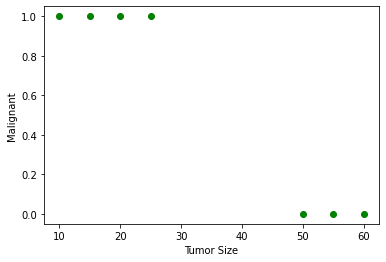

In [49]:
X_train = np.array([10, 15, 20, 25, 50, 55, 60])
y_train = np.array([1, 1, 1, 1, 0, 0, 0])
plt.scatter(X_train, y_train, c='green')
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.plot()

In [50]:
w, b = GradientDescentUnivariateLR(X_train, y_train, lr=0.001).run(-1, 1, 125)

Current cost = 724.8571428571428
Current cost = 179.197216717201
Current cost = 44.31564666312113
Current cost = 10.974292750406338
Current cost = 2.732643684141704
Current cost = 0.6953854255184034
Current cost = 0.19178923950961646
Current cost = 0.06729866458092953
Current cost = 0.036519129885149985
Current cost = 0.02890401099627841
Current cost = 0.02701490253932288
Current cost = 0.026541208726265884
Current cost = 0.026417394281971512
Current cost = 0.02638006976244989
Current cost = 0.026364127984357142
Current cost = 0.02635347511499057
Current cost = 0.02634413292156744
Current cost = 0.026335118023922226
Current cost = 0.026326187338883845
Current cost = 0.026317280777141617
Current cost = 0.026308383483599884
Current cost = 0.026299491784599914
Current cost = 0.026290604770420875
Current cost = 0.026281722214559947
Current cost = 0.02627284405939963
Current cost = 0.02626397028906998
Current cost = 0.026255100898021445
Current cost = 0.02624623588325629
Current cost = 0.02

[]

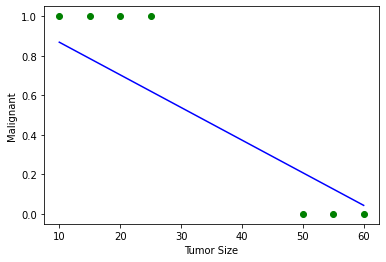

In [51]:
plt.scatter(X_train, y_train, c='green', label='Ground Truth')
plt.plot(X_train, (X_train * w + b), c='b', label='Best fit line')
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.plot()

'''
Clearly, with this model, we would get a non-integer number if we were to predict the outcome of x = 30.
One thing we could do is to pass horizontal line through the predicted line as a threshold.
'''

[]

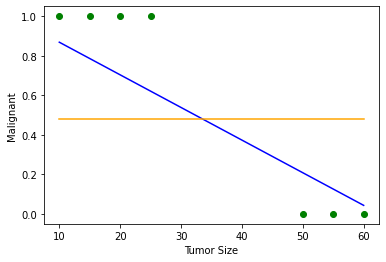

In [53]:
plt.scatter(X_train, y_train, c='green', label='Ground Truth')
predictions = (X_train * w + b)
plt.plot(X_train, predictions, c='b', label='Best fit line')
plt.plot(X_train, np.full(X_train.shape[0], np.mean(predictions)), c='orange')
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.plot()

'''
Anything above this line would be classified as malignant, and anything below would be classified
as benign.
'''